# Tugas Besar Data Mining Kelompok 8

**Anggota Kelompok:**
1. Adinar Tri Panuntun - 102022300174  
2. Ahmad Akmal Amran - 102022300010
3. Muhammad Alvaro Shidqi Faozan - 102022300096
4. Raffi Akbar Firdaus - 102022300186

Link Dataset: https://www.kaggle.com/datasets/jahnavipaliwal/video-game-reviews-and-ratings/data

## Supervised Learning Naive Baiyes

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import pandas as pd

# Set the path to the file you'd like to load
file_path = "video_game_reviews.csv"

nb = pd.read_csv(file_path)

nb.head()

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1


In [4]:
nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               47774 non-null  object 
 1   User Rating              47774 non-null  float64
 2   Age Group Targeted       47774 non-null  object 
 3   Price                    47774 non-null  float64
 4   Platform                 47774 non-null  object 
 5   Requires Special Device  47774 non-null  object 
 6   Developer                47774 non-null  object 
 7   Publisher                47774 non-null  object 
 8   Release Year             47774 non-null  int64  
 9   Genre                    47774 non-null  object 
 10  Multiplayer              47774 non-null  object 
 11  Game Length (Hours)      47774 non-null  float64
 12  Graphics Quality         47774 non-null  object 
 13  Soundtrack Quality       47774 non-null  object 
 14  Story Quality         

In [5]:
nb.describe()

,User Rating,Price,Release Year,Game Length (Hours),Min Number of Players
count,47774.000000,47774.000000,47774.000000,47774.000000,47774.000000
mean,29.719329,39.951371,2016.480952,32.481672,5.116758
std,7.550131,11.520342,4.027276,15.872508,2.769521
min,10.100000,19.990000,2010.000000,5.000000,1.000000
25%,24.300000,29.990000,2013.000000,18.800000,3.000000
50%,29.700000,39.845000,2016.000000,32.500000,5.000000
75%,35.100000,49.957500,2020.000000,46.300000,7.000000
max,49.500000,59.990000,2023.000000,60.000000,10.000000


**Cek Data Duplikasi**

In [6]:
nb.duplicated().sum()

0

In [7]:
df_cleaned = nb.drop_duplicates()

In [8]:
df_cleaned.duplicated().sum()

0

**Cek Nilai Null**

In [9]:
df_cleaned.isnull().sum()

Game Title                 0
User Rating                0
Age Group Targeted         0
Price                      0
Platform                   0
Requires Special Device    0
Developer                  0
Publisher                  0
Release Year               0
Genre                      0
Multiplayer                0
Game Length (Hours)        0
Graphics Quality           0
Soundtrack Quality         0
Story Quality              0
User Review Text           0
Game Mode                  0
Min Number of Players      0
dtype: int64

In [10]:
df_cleaned.isna().sum()

Game Title                 0
User Rating                0
Age Group Targeted         0
Price                      0
Platform                   0
Requires Special Device    0
Developer                  0
Publisher                  0
Release Year               0
Genre                      0
Multiplayer                0
Game Length (Hours)        0
Graphics Quality           0
Soundtrack Quality         0
Story Quality              0
User Review Text           0
Game Mode                  0
Min Number of Players      0
dtype: int64

**Cek Data Outlier**

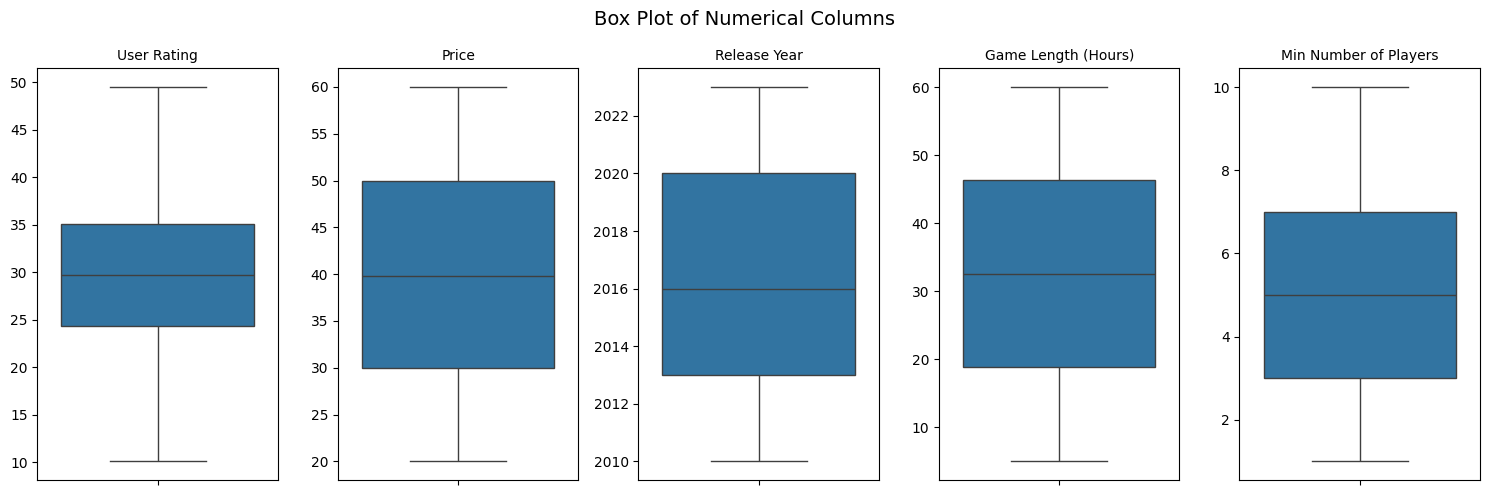

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar kolom numerik yang ingin ditampilkan (misal semua kolom numerik di df_cleaned)
columns = df_cleaned.select_dtypes(include='number').columns

plt.figure(figsize=(len(columns) * 3, 5))  # Ukuran disesuaikan agar tidak terlalu besar
plt.suptitle('Box Plot of Numerical Columns', fontsize=14)

for i, col in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.show()

In [12]:
def find_outlier_boundary(df_cleaned, variable):
  IQR = df_cleaned[variable].quantile(0.75) - df_cleaned[variable].quantile(0.25)

  lower_boundary = df_cleaned[variable].quantile(0.25) - (IQR * 1.5)
  upper_boundary = df_cleaned[variable].quantile(0.75) + (IQR * 1.5)

  return upper_boundary, lower_boundary

In [13]:
full_occup_upper_limit, full_occup_lower_limit = find_outlier_boundary(df_cleaned, 'User Rating')
full_occup_upper_limit, full_occup_lower_limit

(51.300000000000004, 8.099999999999998)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def check_plot(data, column_name):
    """
    Menampilkan Histogram, Probability Plot, dan Boxplot dari satu kolom numerik.

    Parameters:
    - data: DataFrame
    - column_name: str, nama kolom yang akan dianalisis
    """
    plt.figure(figsize=(18, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[column_name], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    # Probability Plot
    plt.subplot(1, 3, 2)
    stats.probplot(data[column_name].dropna(), dist="norm", plot=plt)
    plt.title(f'Probability Plot of {column_name}')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data[column_name], color='lightcoral')
    plt.title(f'Boxplot of {column_name}')
    plt.xlabel(column_name)

    plt.tight_layout()
    plt.show()

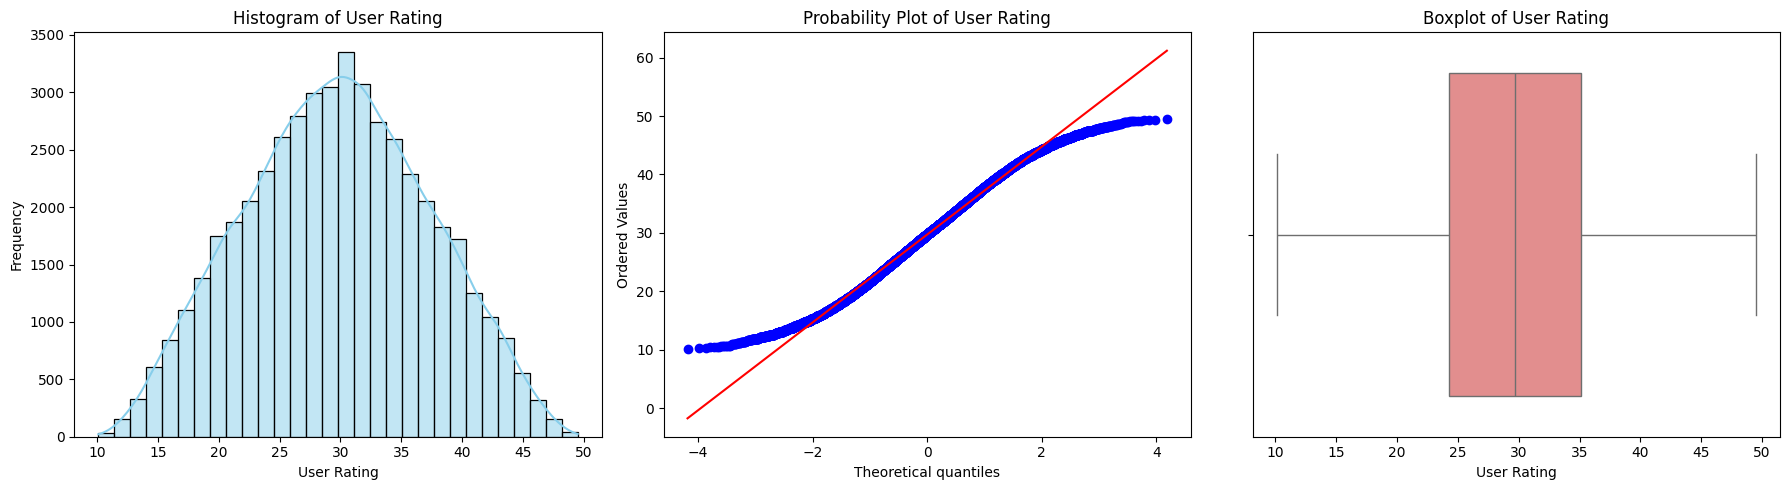

In [15]:
check_plot(df_cleaned, 'User Rating')

Cek nilai unik dari setiap kolom untuk memudahkan mapping

In [16]:
print(df_cleaned['Age Group Targeted'].unique())
print(df_cleaned['Platform'].unique())
print(df_cleaned['Genre'].unique())
print(df_cleaned['Graphics Quality'].unique())
print(df_cleaned['Soundtrack Quality'].unique())
print(df_cleaned['Story Quality'].unique())

['All Ages' 'Adults' 'Teens' 'Kids']
['PC' 'Mobile' 'PlayStation' 'Xbox' 'Nintendo Switch']
['Adventure' 'Shooter' 'Sports' 'RPG' 'Simulation' 'Strategy' 'Fighting'
 'Action' 'Party' 'Puzzle']
['Medium' 'Low' 'High' 'Ultra']
['Average' 'Poor' 'Good' 'Excellent']
['Poor' 'Average' 'Excellent' 'Good']


Drop kolom yang tidak berpengaruh terhadap model

In [17]:
df_cleaned = df_cleaned.drop(columns=['Game Title', 'Developer', 'Publisher', 'Release Year', 'User Review Text' ]) 

Encode kolom kategorikal dengan bentuk yes/no dan game mode offline/online

In [18]:

yes_no_cols = [col for col in df_cleaned.columns 
               if df_cleaned[col].dtype == 'object' and set(df_cleaned[col].dropna().unique()) <= {'Yes', 'No'}]

for col in yes_no_cols:
    df_cleaned[col] = df_cleaned[col].map({'Yes': 1, 'No': 0})

on_of_cols = [col for col in df_cleaned.columns 
               if df_cleaned[col].dtype == 'object' and set(df_cleaned[col].dropna().unique()) <= {'Online', 'Offline'}]

for col in on_of_cols:
    df_cleaned[col] = df_cleaned[col].map({'Online': 1, 'Offline': 0})

In [19]:
age_mapping = {
    'All Ages' : 0,
    'Adults' : 1,
    'Teens' : 2,
    'Kids' : 3
}
Platform_mapping = {
   'Mobile': 0,
    'PC': 1,
    'PlayStation': 2,
    'Xbox': 3,
    'Nintendo Switch': 4
}
genre_mapping ={
     'Action': 0,
    'Adventure': 1,
    'Fighting': 2,
    'Party': 3,
    'Puzzle': 4,
    'RPG': 5,
    'Shooter': 6,
    'Simulation': 7,
    'Sports': 8,
    'Strategy': 9
}
graphic_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Ultra': 3
}
sound_mapping = {
    'Poor': 0,
    'Average': 1,
    'Good': 2,
    'Excellent': 3
}
story_mapping = {
    'Poor': 0,
    'Average': 1,
    'Good': 2,
    'Excellent': 3
}

In [20]:
df_cleaned['Age Group Targeted'] = df_cleaned['Age Group Targeted'].map(age_mapping)
df_cleaned['Platform'] = df_cleaned['Platform'].map(Platform_mapping)
df_cleaned['Genre'] = df_cleaned['Genre'].map(genre_mapping)
df_cleaned['Graphics Quality'] = df_cleaned['Graphics Quality'].map(graphic_mapping)
df_cleaned['Soundtrack Quality'] = df_cleaned['Soundtrack Quality'].map(sound_mapping)
df_cleaned['Story Quality'] = df_cleaned['Story Quality'].map(story_mapping)
df_cleaned.head()

,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,Game Mode,Min Number of Players
0,36.4,0,41.41,1,0,1,0,55.3,1,1,0,0,1
1,38.3,1,57.56,1,0,6,1,34.6,0,0,0,0,3
2,26.8,2,44.93,1,1,1,1,13.9,0,2,1,0,5
3,38.4,0,48.29,0,1,8,0,41.9,1,2,3,1,4
4,30.1,1,55.49,2,1,5,1,13.2,2,0,2,0,1


Cek distribusi rating user

count    47774.000000
mean        29.719329
std          7.550131
min         10.100000
25%         24.300000
50%         29.700000
75%         35.100000
max         49.500000
Name: User Rating, dtype: float64


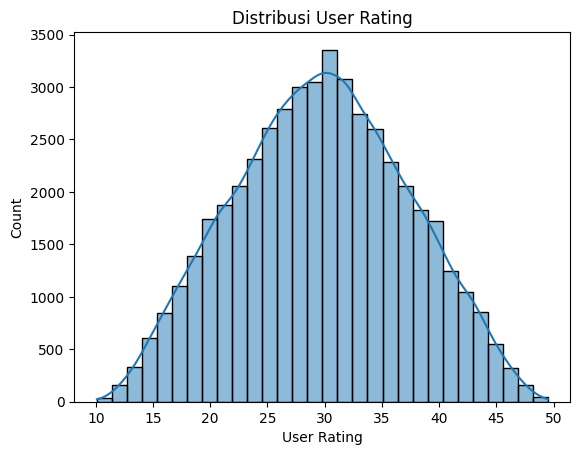

In [21]:
print(df_cleaned['User Rating'].describe())
sns.histplot(df_cleaned['User Rating'], bins=30, kde=True)
plt.title('Distribusi User Rating')
plt.show()

karena distribusi normal klasifikasi kan user rating menjadi : poor,average dan good

In [22]:
def classify_rating(r):
    if r < 25:
        return 'Poor'
    elif r < 35:
        return 'Average'
    else:
        return 'Good'

df_cleaned['user_rating_class'] = df_cleaned['User Rating'].apply(classify_rating)
df_cleaned.head()

,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,Game Mode,Min Number of Players,user_rating_class
0,36.4,0,41.41,1,0,1,0,55.3,1,1,0,0,1,Good
1,38.3,1,57.56,1,0,6,1,34.6,0,0,0,0,3,Good
2,26.8,2,44.93,1,1,1,1,13.9,0,2,1,0,5,Average
3,38.4,0,48.29,0,1,8,0,41.9,1,2,3,1,4,Good
4,30.1,1,55.49,2,1,5,1,13.2,2,0,2,0,1,Average


mapping user rating class menjadi bentuk angka

In [23]:
label_mapping = {
    'Poor': 0,
    'Average': 1,
    'Good': 2
}
df_cleaned['user_rating_class'] = df_cleaned['user_rating_class'].map(label_mapping)



In [24]:
df_cleaned.head()

,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,Game Mode,Min Number of Players,user_rating_class
0,36.4,0,41.41,1,0,1,0,55.3,1,1,0,0,1,2
1,38.3,1,57.56,1,0,6,1,34.6,0,0,0,0,3,2
2,26.8,2,44.93,1,1,1,1,13.9,0,2,1,0,5,1
3,38.4,0,48.29,0,1,8,0,41.9,1,2,3,1,4,2
4,30.1,1,55.49,2,1,5,1,13.2,2,0,2,0,1,1


### Build Model

cek distribusi user rating class

In [25]:
print(df_cleaned['user_rating_class'].value_counts())

user_rating_class
1    22290
0    13207
2    12277
Name: count, dtype: int64


### Data Balancing

Pisahkan setiap kelas

In [26]:
from sklearn.utils import resample

df_class_0 = df_cleaned[df_cleaned['user_rating_class'] == 0]
df_class_1 = df_cleaned[df_cleaned['user_rating_class'] == 1]
df_class_2 = df_cleaned[df_cleaned['user_rating_class'] == 2]

Tentukan jumlah target

In [27]:
target_count = len(df_class_2)

Downsample kelas 0 dan 1

In [28]:
df_class_0_downsampled = resample(df_class_0, replace=False, n_samples=target_count, random_state=42)
df_class_1_downsampled = resample(df_class_1, replace=False, n_samples=target_count, random_state=42)


Gabungkan semua kelas yang sudah disamakan

In [29]:
df_downsampled = pd.concat([df_class_0_downsampled, df_class_1_downsampled, df_class_2])
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df_downsampled['user_rating_class'].value_counts()

user_rating_class
0    12277
2    12277
1    12277
Name: count, dtype: int64

Pisahkan fitur dan label

In [30]:
X = df_downsampled.drop(columns=['User Rating', 'user_rating_class'])
y = df_downsampled['user_rating_class']

Import model

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
nb_model = GaussianNB()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = nb_model.predict(X_test)

### Evaluasi Model

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy:.4f}")


Akurasi Model: 0.8759


Tampilkan hasil **confusion matrix** hasil prediksi model


In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[2192  308    0]
 [ 164 2092  174]
 [   0  268 2169]]


Menampilkan classification report hasil prediksi model

In [37]:
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2500
           1       0.78      0.86      0.82      2430
           2       0.93      0.89      0.91      2437

    accuracy                           0.88      7367
   macro avg       0.88      0.88      0.88      7367
weighted avg       0.88      0.88      0.88      7367



Import library yang akan digunakan untuk melakukan evaluasi model menggunakan ROC


In [38]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np

Binarize label untuk multiclass ROC

In [39]:
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

Train-Test split

In [40]:
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)


One-vs-Rest Naive Bayes

In [41]:
model = OneVsRestClassifier(nb_model)
y_score = model.fit(X_train, y_train_bin).predict_proba(X_test)

Compute ROC curve and AUC for each class

In [42]:
fpr = dict()
tpr = dict()
roc_auc_per_classes = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc_per_classes[i] = auc(fpr[i], tpr[i])


Visualisasi hasil ROC

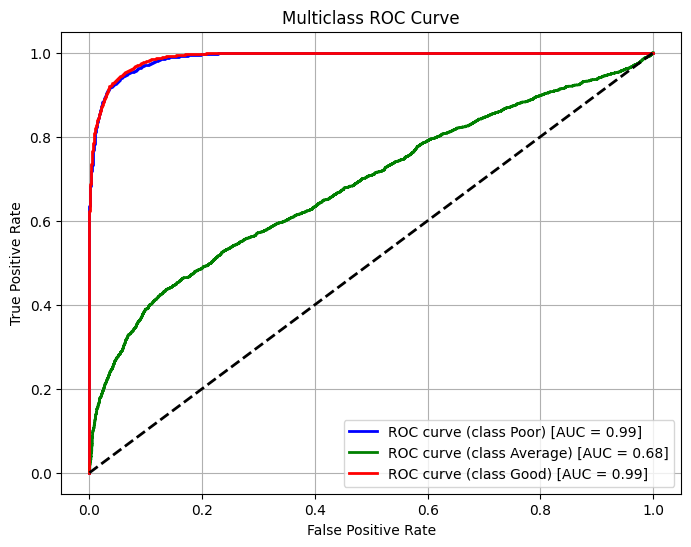

In [43]:
plt.figure(figsize=(8,6))
colors = ['blue', 'green', 'red']
labels = ['Poor', 'Average', 'Good']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve (class {labels[i]}) [AUC = {roc_auc_per_classes[i]:.2f}]')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()

#### **Model Tuning**

In [44]:
from sklearn.model_selection import cross_val_score, cross_val_predict


In [45]:

try:
    roc_auc_macro = roc_auc_score(y_test_bin, y_score, average="macro")
    print(f"ROC AUC (Macro OVR): {roc_auc_macro:.4f}")

    roc_auc_weighted = roc_auc_score(y_test_bin, y_score, average="weighted")
    print(f"ROC AUC (Weighted OVR): {roc_auc_weighted:.4f}")
except ValueError as e:
    print(f"Terjadi kesalahan saat menghitung ROC AUC: {e}")
    print("Pastikan y_test_bin dan y_score memiliki dimensi yang sesuai.")
    print(f"Shape y_test_bin: {y_test_bin.shape if 'y_test_bin' in locals() else 'Belum terdefinisi'}")
    print(f"Shape y_score: {y_score.shape if 'y_score' in locals() else 'Belum terdefinisi'}")


ROC AUC (Macro OVR): 0.8874
ROC AUC (Weighted OVR): 0.8885


In [46]:
y_pred_cv = cross_val_predict(model, X, y, cv=5)
accuracy = accuracy_score(y, y_pred_cv)
print(f"Akurasi (5-Fold Cross Validation): {accuracy:.4f}")

Akurasi (5-Fold Cross Validation): 0.8876


In [47]:
cm = confusion_matrix(y, y_pred_cv)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[11796   481     0]
 [ 1614  9116  1547]
 [    0   497 11780]]


In [48]:
report = classification_report(y, y_pred_cv)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     12277
           1       0.90      0.74      0.81     12277
           2       0.88      0.96      0.92     12277

    accuracy                           0.89     36831
   macro avg       0.89      0.89      0.88     36831
weighted avg       0.89      0.89      0.88     36831



In [49]:
try:
    print("Trying with scoring='roc_auc_ovr_weighted'")
    scores_ovr_w = cross_val_score(model, X, y, cv=5, scoring='roc_auc_ovr_weighted')

    for i, score in enumerate(scores_ovr_w, 1):
        print(f"Fold {i}: ROC AUC (OVR Weighted) = {score:.4f}")
    average_score_ovr_w = scores_ovr_w.mean()
    print(f"\nRata-rata ROC AUC (OVR Weighted): {average_score_ovr_w:.4f}\n")

except Exception as e:
    print(f"Error with 'roc_auc_ovr_weighted': {e}\n")

Trying with scoring='roc_auc_ovr_weighted'
Fold 1: ROC AUC (OVR Weighted) = 0.9832
Fold 2: ROC AUC (OVR Weighted) = 0.9811
Fold 3: ROC AUC (OVR Weighted) = 0.9812
Fold 4: ROC AUC (OVR Weighted) = 0.9825
Fold 5: ROC AUC (OVR Weighted) = 0.9817

Rata-rata ROC AUC (OVR Weighted): 0.9819



In [50]:
import joblib

joblib.dump(model, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

## Unsupervised Learning K-Means Clustering Segmentasi Pasar

In [51]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import StandardScaler

ds = pd.read_csv('video_game_reviews.csv')
ds.head(2)

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3


In [52]:
# Investigate all the elements whithin each Feature 
for column in ds:
    unique_vals = np.unique(ds[column].astype(str).fillna('0'))
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Game Title :40
The number of values for feature User Rating :392
The number of values for feature Age Group Targeted :4 -- ['Adults' 'All Ages' 'Kids' 'Teens']
The number of values for feature Price :4001
The number of values for feature Platform :5 -- ['Mobile' 'Nintendo Switch' 'PC' 'PlayStation' 'Xbox']
The number of values for feature Requires Special Device :2 -- ['No' 'Yes']
The number of values for feature Developer :10 -- ['Bungie' 'CD Projekt Red' 'Capcom' 'EA Sports' 'Epic Games' 'Game Freak'
 'Innersloth' 'Nintendo' 'Rockstar Games' 'Valve']
The number of values for feature Publisher :9 -- ['Activision' 'Capcom' 'Electronic Arts' 'Epic Games' 'Innersloth'
 'Nintendo' 'Square Enix' 'Take-Two Interactive' 'Valve']
The number of values for feature Release Year :14
The number of values for feature Genre :10 -- ['Action' 'Adventure' 'Fighting' 'Party' 'Puzzle' 'RPG' 'Shooter'
 'Simulation' 'Sports' 'Strategy']
The number of values for feature Mult

In [53]:
def map_price(price):
    if price == 0:
        return 0  # Gratis
    elif price < 20:
        return 1  # Murah
    elif price < 40:
        return 2  # Sedang
    else:
        return 3  # Mahal

ds['Price'] = ds['Price'].map(map_price)

In [54]:
ds.drop(columns=['Platform', 'Requires Special Device', 'Developer', 'Publisher', 'Release Year', 'Game Length (Hours)', 'Graphics Quality', 'Soundtrack Quality', 'Story Quality', 'Game Title', 'User Review Text', 'Min Number of Players', 'User Rating' ], inplace=True)

categorical_cols = ['Age Group Targeted', 'Genre', 'Game Mode', 'Multiplayer']

data_encoded = pd.get_dummies(ds, columns=categorical_cols, drop_first=False)

In [55]:
data_encoded.head()

,Price,Age Group Targeted_Adults,Age Group Targeted_All Ages,Age Group Targeted_Kids,Age Group Targeted_Teens,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Party,Genre_Puzzle,Genre_RPG,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Game Mode_Offline,Game Mode_Online,Multiplayer_No,Multiplayer_Yes
0,3,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False
1,3,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True
2,3,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True
3,3,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False
4,3,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True


In [56]:
# Standardize numerical features
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_encoded)

In [57]:
print("Sebelum Standarisasi:")
print(data_encoded.describe().T)

scaled_df = pd.DataFrame(scaled_features, columns=data_encoded.columns)
print("\nSetelah Standarisasi:")
print(scaled_df.describe().T)

Sebelum Standarisasi:
         count      mean       std  min  25%  50%  75%  max
Price  47774.0  2.496128  0.500367  1.0  2.0  2.0  3.0  3.0

Setelah Standarisasi:
                               count          mean      std       min  \
Price                        47774.0  4.313170e-16  1.00001 -2.990092   
Age Group Targeted_Adults    47774.0 -3.242314e-17  1.00001 -0.571727   
Age Group Targeted_All Ages  47774.0  3.688504e-17  1.00001 -0.577689   
Age Group Targeted_Kids      47774.0  5.532756e-17  1.00001 -0.579590   
Age Group Targeted_Teens     47774.0  3.331552e-17  1.00001 -0.580396   
Genre_Action                 47774.0 -3.301806e-17  1.00001 -0.327942   
Genre_Adventure              47774.0  9.518720e-18  1.00001 -0.332270   
Genre_Fighting               47774.0  3.539774e-17  1.00001 -0.329818   
Genre_Party                  47774.0  4.997328e-17  1.00001 -0.332193   
Genre_Puzzle                 47774.0 -4.848598e-17  1.00001 -0.335059   
Genre_RPG                    477

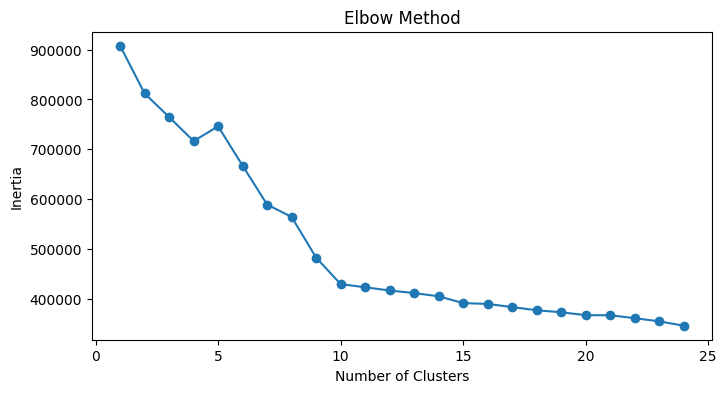

In [58]:
# Elbow Method for Best Number of Clusters
inertia = []
K = range(1, 25)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [59]:
# Run K-means
optimal_clusters = 4 
kmean = KMeans(n_clusters=optimal_clusters, random_state=42)
ds['Cluster'] = kmean.fit_predict(scaled_features)
ds.head()

,Age Group Targeted,Price,Genre,Multiplayer,Game Mode,Cluster
0,All Ages,3,Adventure,No,Offline,3
1,Adults,3,Shooter,Yes,Offline,1
2,Teens,3,Adventure,Yes,Offline,1
3,All Ages,3,Sports,No,Online,2
4,Adults,3,RPG,Yes,Offline,1


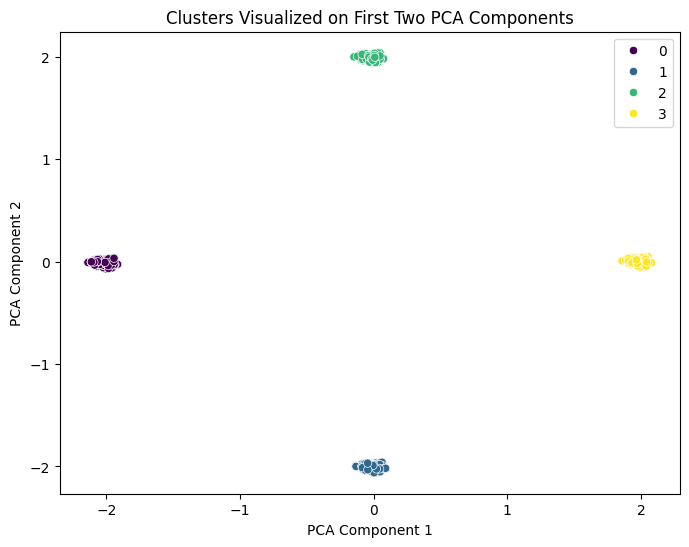

In [60]:
# Visualize Clusters
pca_features = PCA().fit_transform(scaled_features)
pca_2d = pca_features[:, :2]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=ds['Cluster'], palette='viridis')
plt.title('Clusters Visualized on First Two PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

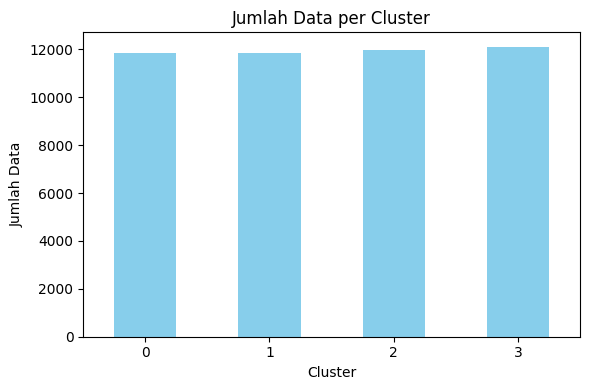

In [61]:
import matplotlib.pyplot as plt

cluster_counts = ds['Cluster'].value_counts().sort_index()
plt.figure(figsize=(6,4))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [62]:
ds[ds['Cluster'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11838 entries, 17 to 47773
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age Group Targeted  11838 non-null  object
 1   Price               11838 non-null  int64 
 2   Genre               11838 non-null  object
 3   Multiplayer         11838 non-null  object
 4   Game Mode           11838 non-null  object
 5   Cluster             11838 non-null  int32 
dtypes: int32(1), int64(1), object(4)
memory usage: 601.1+ KB


In [63]:
ds.head()

,Age Group Targeted,Price,Genre,Multiplayer,Game Mode,Cluster
0,All Ages,3,Adventure,No,Offline,3
1,Adults,3,Shooter,Yes,Offline,1
2,Teens,3,Adventure,Yes,Offline,1
3,All Ages,3,Sports,No,Online,2
4,Adults,3,RPG,Yes,Offline,1


In [64]:
ds[ds['Cluster'] == 2].head()

,Age Group Targeted,Price,Genre,Multiplayer,Game Mode,Cluster
3,All Ages,3,Sports,No,Online,2
6,Adults,3,Simulation,No,Online,2
8,All Ages,2,Fighting,No,Online,2
18,Teens,3,Action,No,Online,2
19,Kids,3,Shooter,No,Online,2


In [65]:
# Separate numeric and categorical columns
numeric_columns = ds.select_dtypes(include=[np.number]).columns
categorical_columns = [col for col in ds.columns if col not in numeric_columns and col != 'Cluster']

# Numeric aggregation
numeric_analysis = ds.groupby('Cluster', as_index=False)[numeric_columns].mean()
numeric_analysis = numeric_analysis[['Cluster', 'Price']]

# Categorical aggregation: Count occurrences of each category per cluster
categorical_analysis = {}
for col in categorical_columns:
    counts = ds.groupby('Cluster')[col].value_counts().unstack(fill_value=0)
    counts.columns = [f"{col}_{val}" for val in counts.columns]  # Rename columns to include category values
    categorical_analysis[col] = counts

# Combine categorical counts into a single DataFrame
categorical_analysis_df = pd.concat(categorical_analysis.values(), axis=1).reset_index()

# Combine numeric and categorical summaries
cluster_analysis = pd.merge(numeric_analysis, categorical_analysis_df, on='Cluster', how='left')

# Display the combined analysis
cluster_analysis

,Cluster,Price,Age Group Targeted_Adults,Age Group Targeted_All Ages,Age Group Targeted_Kids,Age Group Targeted_Teens,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Party,Genre_Puzzle,Genre_RPG,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Multiplayer_No,Multiplayer_Yes,Game Mode_Offline,Game Mode_Online
0,0.0,2.502788,2940,2903,3071,2924,1167,1171,1149,1182,1208,1227,1215,1183,1189,1147,0,11838,0,11838
1,1.0,2.497636,2924,2941,2978,3003,1151,1175,1187,1182,1182,1187,1175,1148,1202,1257,0,11846,11846,0
2,2.0,2.494616,2890,3008,3019,3062,1129,1189,1143,1183,1204,1218,1245,1222,1228,1218,11979,0,0,11979
3,3.0,2.489638,3015,3102,2945,3049,1192,1215,1208,1201,1228,1241,1234,1231,1116,1245,12111,0,12111,0


In [66]:
# Storing our results
import pickle
import joblib

with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmean, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save PCA first two components and cluster labels
pca_2d_df = pd.DataFrame(pca_features[:, :2], columns=['PCA1', 'PCA2'])
pca_2d_df['Cluster'] = ds['Cluster'] # Assuming 'Cluster' is in data_encoded

# Save to Excel
pca_2d_df.to_excel('pca_2d.xlsx', index=False)

# # Export the cluster_analysis DataFrame to an Excel file
cluster_analysis.to_excel('cluster_analysis.xlsx', index=False)

# Exporting the data with predictions
ds.to_excel('main_data_with_pred.xlsx', index=False)

joblib.dump(list(data_encoded.columns), 'data_encoded_columns.pkl')

['data_encoded_columns.pkl']

## Dashboard

**Pake token masing-masing**

In [67]:
!ngrok config add-authtoken <YOUR_NGROK_AUTH_TOKEN>

The syntax of the command is incorrect.


In [74]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import plotly.express as px
from PIL import Image
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Diganti dari sklearn.discriminant_analysis

st.set_page_config(
    page_title="Analisis Model Segmentasi & Prediksi Rating Game",
    page_icon="🎮",
    layout="wide"
)

st.markdown(
    """
    <style>
    /* Remove default top margin and padding */
    .block-container {
        padding-top: 0rem;
    }
    .title {
        text-align: center;
        font-size: 32px;
        font-weight: bold;
        color: #333333;
    }
    .subheader {
        text-align: center;
        font-size: 24px;
        font-weight: bold;
        color: #555555;
    }
    .scrollable-summary {
        height: 420px;
        overflow-y: auto;
        border: 1px solid #ccc;
        padding: 10px;
        background-color: #f9f9f9;
    }
    </style>
    """,
    unsafe_allow_html=True,
)

def main():
    # Judul Dashboard
    st.markdown("---------------------------------------------")

    # Menggunakan Tabs untuk memisahkan dua jenis model
    tab1, tab2 = st.tabs(["🔍 Unsupervised Learning", "🎯 Supervised Learning"])

    # --- Tab Unsupervised Learning ---
    with tab1:

        data_encoded_columns = joblib.load('data_encoded_columns.pkl')
        
        with open('kmeans_model.pkl', 'rb') as model_file:
            kmeans_model_unsupervised = pickle.load(model_file) 

        with open('scaler.pkl', 'rb') as scaler_file:
            scaler_unsupervised = pickle.load(scaler_file) 
        
        # Load PCA data from Excel
        pca_2d_df = pd.read_excel('pca_2d.xlsx')

        # Load cluster_analysis data from Excel
        cluster_analysis = pd.read_excel('cluster_analysis.xlsx')
        
        # Main page layout
        st.markdown('<h1 class="title">Pengelompokan Game Berdasarkan Segmentasi Pasar menggunakan Metode K-Means Clustering</h1>', unsafe_allow_html=True)

        st.subheader("Cluster Visualization") 
        fig = px.scatter(
            pca_2d_df, 
            x='PCA1', 
            y='PCA2', 
            color='Cluster', 
            title="Clusters Visualized with PCA", 
            labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2'},
            template='plotly'
        )
        st.plotly_chart(fig)

        data_summary = {
            "Aspek": [
                "Target Usia Dominan",
                "Harga Dominan",
                "Genre Populer",
                "Multiplayer",
                "Game Mode"
            ],
            "Cluster 0": [
                "Kids dan Teens",
                "2 (terjangkau) dan 3 (tinggi)",
                "Puzzle, Simulation, Sports, Adventure",
                "Ya (Yes)",
                "Online"
            ],
            "Cluster 1": [
                "Teens dan Adults",
                "3 (tinggi)",
                "Shooter, Strategy, RPG, Adventure",
                "Ya (Yes)",
                "Offline"
            ],
            "Cluster 2": [
                "All Ages dan Kids", 
                "3 (tinggi) dan 2 (menengah)",
                "Puzzle, RPG, Adventure, Shooter, Party",
                "Tidak (No)",
                "Online"
            ],
            "Cluster 3": [
                "All Ages",
                "3 (tinggi) dan 2 (menengah)",
                "Adventure, Party, RPG, Simulation, Action",
                "Tidak (No)",
                "Offline"
            ]
        }

        # Membuat DataFrame dari data
        df_summary = pd.DataFrame(data_summary)

        st.subheader("Ringkasan Segmentasi Pasar per Cluster") 
        st.table(df_summary)

        st.markdown("---")
        st.markdown("Kluster 0:")
        st.markdown("Game online multiplayer (sosial/kompetitif) untuk anak & remaja dengan genre dominan Puzzle, Simulasi, Sports, Adventure. Harga bervariasi (terjangkau & tinggi), dipasarkan sebagai platform online multiplayer yang murah.")
        st.markdown("Kluster 1:")
        st.markdown("Game premium offline dengan gameplay kompleks untuk remaja & dewasa, didominasi genre Shooter, Strategy, RPG, Adventure. Harga tinggi dan mendukung multiplayer (kemungkinan besar lokal/offline).")
        st.markdown("Kluster 2:")
        st.markdown("Game online single-player kasual naratif untuk semua usia & anak. Genre populer meliputi Puzzle, RPG, Adventure, Shooter, Party. Harga cenderung menengah hingga tinggi dan tidak ada multiplayer.")
        st.markdown("Kluster 3:")
        st.markdown("Game offline santai yang cocok untuk keluarga dan semua usia. Genre utama adalah Adventure, Party, RPG, Simulation, Action. Harga berada di kisaran menengah hingga tinggi dan tidak ada fitur multiplayer.")
        st.markdown("---")


        st.subheader("Cluster Analysis Table")
        st.dataframe(cluster_analysis.head(), height=212)

        col_1, col_2 = st.columns(2)

        with col_1:
            st.markdown('<h2 class="subheader">Input Data untuk K-Means Clustering</h2>', unsafe_allow_html=True)
            numeric_features_unsupervised = ['Price'] 
            categorical_options_unsupervised = { 
                'Age Group Targeted': ['All Ages', 'Adults', 'Teens', 'Kids'],
                'Genre': ['Action', 'Adventure', 'Fighting', 'Party', 'Puzzle', 'RPG', 'Shooter', 'Simulation', 'Sports', 'Strategy'],
                'Multiplayer': ['Yes', 'No'],
                'Game Mode': ['Online', 'Offline']
            }

            user_inputs_unsupervised = {} 

            # Numeric input
            for feature in numeric_features_unsupervised:
                user_inputs_unsupervised[feature] = st.number_input(f"{feature} (USD)", value=0.0, key=f"unsupervised_{feature}")
            # One-hot encoding for categorical input
            for feature, options in categorical_options_unsupervised.items():
                selected_value = st.selectbox(f"{feature} (Unsupervised)", options, key=f"unsupervised_{feature}_select")
                for option in options:
                    col_name = f"{feature}_{option}"
                    user_inputs_unsupervised[col_name] = 1 if selected_value == option else 0

            # Buat DataFrame dan reindex sesuai urutan kolom saat training
            input_df_unsupervised = pd.DataFrame([user_inputs_unsupervised])
            input_df_unsupervised = input_df_unsupervised.reindex(columns=data_encoded_columns, fill_value=0)

            if st.button("Cluster Me", key="cluster_me_button"):
                # Pastikan scaler dan kmeans model yang benar digunakan
                cluster_id = int(kmeans_model_unsupervised.predict(scaler_unsupervised.transform(input_df_unsupervised))[0])
                st.session_state['cluster_id'] = cluster_id
                st.success(f"You belong to Cluster {cluster_id}.")
                
        with col_2:
            cluster_id = st.session_state.get('cluster_id', None)
            if cluster_id is not None:
                if cluster_id == 0:
                    st.markdown('<h2 class="subheader">Interpretasi Segmentasi Pasar</h2>', unsafe_allow_html=True)
                    st.write("")
                    st.markdown("## Segmentasi Pasar untuk Cluster 0:")
                    st.write("") 
                    st.markdown("### Target utama: Anak-anak dan remaja")
                    st.write("")  
                    st.markdown("### Karakteristik pengguna:")
                    st.markdown("""
                    * Menginginkan game online multiplayer
                    * Menyukai game dengan harga terjangkau
                    * Tertarik pada genre ringan, kasual, dan mudah dimainkan
                    """)
                    st.write("") 
                    st.markdown("### Strategi pemasaran yang cocok:")
                    st.markdown("""
                    * Fokus pada media sosial atau platform yang sering digunakan anak-anak dan remaja (TikTok, Instagram, YouTube)
                    * Tawarkan sistem komunitas atau fitur sosial dalam game
                    * Promosikan keunggulan multiplayer online dan harga ekonomis
                    """)
                elif cluster_id == 1:
                    st.markdown('<h2 class="subheader">Interpretasi Segmentasi Pasar</h2>', unsafe_allow_html=True)
                    st.write("")
                    st.markdown("## Segmentasi Pasar untuk Cluster 1:")
                    st.write("") 
                    st.markdown("### Target utama: Dewasa dan remaja")
                    st.write("") 
                    st.markdown("### Karakteristik pengguna:")
                    st.markdown("""
                    * Lebih menyukai game **offline** dengan dukungan multiplayer lokal
                    * Bersedia membayar lebih untuk game dengan **harga tinggi (3)**
                    * Tertarik pada genre yang **kompleks dan strategis** seperti Shooter, RPG, Strategy, dan Adventure
                    """)
                    st.write("") 
                    st.markdown("### Strategi pemasaran yang cocok:")
                    st.markdown("""
                    * Fokus pada **komunitas gamer serius** seperti forum game, YouTube review RPG/strategi, atau komunitas offline
                    * Soroti **kualitas gameplay mendalam, cerita menarik, dan nilai replayability tinggi**
                    * Gunakan model **premium (berbayar penuh)** daripada sistem mikrotransaksi atau freemium
                    """)
                elif cluster_id == 2:
                    st.markdown('<h2 class="subheader">Interpretasi Segmentasi Pasar</h2>', unsafe_allow_html=True)
                    st.write("")
                    st.markdown("## Segmentasi Pasar untuk Cluster 2:")
                    st.write("") 
                    st.markdown("### Target utama: Campuran antara anak-anak, remaja, dan dewasa, dengan distribusi cukup merata")
                    st.write("")  
                    st.markdown("### Karakteristik pengguna:")
                    st.markdown("""
                    * Menyukai game **online**, namun **tidak mendukung multiplayer** (single-player online)
                    * Didominasi oleh game dengan **harga tinggi (3)**, meskipun terdapat beberapa harga menengah (2)
                    * Genre yang muncul cukup beragam, seperti **Puzzle, RPG, Adventure, Shooter, Fighting, dan Party**, namun semuanya dimainkan secara individu
                    """)
                    st.write("")  
                    st.markdown("### Strategi pemasaran yang cocok:")
                    st.markdown("""
                    * Fokus pada promosi ke pengguna yang **menyukai pengalaman bermain sendiri namun tetap online**, seperti kompetisi skor, pencapaian, dan konten yang bisa diunduh
                    * Soroti elemen gameplay yang **immersif, naratif, atau menantang**, karena pengguna ini mencari kepuasan pribadi dalam bermain
                    * Gunakan platform online seperti **Steam, PlayStation Store, atau mobile app store**, dengan penekanan pada **konten tambahan dan replayability**
                    """)
                elif cluster_id == 3:
                    st.markdown('<h2 class="subheader">Interpretasi Segmentasi Pasar</h2>', unsafe_allow_html=True)
                    st.write("")
                    st.markdown("## Segmentasi Pasar untuk Cluster 3:")
                    st.write("")  
                    st.markdown("### Target utama: All Ages mendominasi, diikuti oleh Kids, Adults, dan Teens")
                    st.write("")  
                    st.markdown("### Karakteristik pengguna:")
                    st.markdown("""
                    * Lebih menyukai game **offline single-player** (tanpa multiplayer dan tanpa koneksi internet)
                    * Banyak game berada pada **harga tinggi (3)**, menunjukkan kecenderungan pada produk dengan nilai lebih
                    * Genre yang mendominasi adalah **Adventure**, diikuti oleh **Party, RPG, Simulation, dan Action**, yang menunjukkan preferensi pada eksplorasi dan hiburan kasual
                    """)
                    st.write("") 
                    st.markdown("### Strategi pemasaran yang cocok:")
                    st.markdown("""
                    * Cocok untuk **keluarga dan pengguna kasual** yang ingin bermain tanpa tergantung koneksi internet
                    * Soroti fitur seperti **cerita yang menarik, gameplay santai, dan aksesibilitas lintas usia**
                    * Dapat dipasarkan melalui **bundle keluarga** atau **edukatif ringan**, serta promosi di **platform offline-friendly** seperti konsol atau PC non-online
                    """)
            

    # --- Tab Supervised Learning ---
    with tab2:
        st.markdown('<h1 class="title">Prediksi Rating Game (Naive Bayes)</h1>', unsafe_allow_html=True)
        
        try:
            nb_model = joblib.load('naive_bayes_model.pkl')
        except FileNotFoundError:
            st.error("Model Naive Bayes (naive_bayes_model.pkl) tidak ditemukan. Pastikan file model ada di direktori yang sama.")
            nb_model = None
        except Exception as e:
            st.error(f"Terjadi kesalahan saat memuat model: {e}")
            nb_model = None

        if nb_model is not None:
            st.sidebar.header("Input Fitur Prediksi Rating")

            # Definisikan opsi dan mapping untuk input supervised learning
            age_options_nb = {'All Ages': 0, 'Adults': 1, 'Teens': 2, 'Kids': 3}
            platform_options_nb = {'Mobile': 0, 'PC': 1, 'PlayStation': 2, 'Xbox': 3, 'Nintendo Switch': 4}
            genre_options_nb = {'Action': 0, 'Adventure': 1, 'Fighting': 2, 'Party': 3, 'Puzzle': 4, 'RPG': 5, 'Shooter': 6, 'Simulation': 7, 'Sports': 8, 'Strategy': 9}
            graphic_options_nb = {'Low': 0, 'Medium': 1, 'High': 2, 'Ultra': 3}
            sound_story_options_nb = {'Poor': 0, 'Average': 1, 'Good': 2, 'Excellent': 3}
            yes_no_options_nb = {'No': 0, 'Yes': 1}
            game_mode_options_nb = {'Offline': 0, 'Online': 1}
            
            # Urutan fitur sesuai dengan saat training model Naive Bayes
            # X = df_downsampled.drop(columns=['User Rating', 'user_rating_class'])
            # Urutan kolom X: ['Age Group Targeted', 'Price', 'Platform', 'Requires Special Device', 
            # 'Genre', 'Multiplayer', 'Game Length (Hours)', 'Graphics Quality', 
            # 'Soundtrack Quality', 'Story Quality', 'Game Mode', 'Min Number of Players']

            input_nb = {}
            input_nb['Age Group Targeted'] = st.sidebar.selectbox("Target Usia (Prediksi)", list(age_options_nb.keys()), key="nb_age")
            input_nb['Price'] = st.sidebar.number_input("Harga (Prediksi)", min_value=0.0, value=30.0, step=0.01, key="nb_price")
            input_nb['Platform'] = st.sidebar.selectbox("Platform (Prediksi)", list(platform_options_nb.keys()), key="nb_platform")
            input_nb['Requires Special Device'] = st.sidebar.selectbox("Membutuhkan Perangkat Khusus? (Prediksi)", list(yes_no_options_nb.keys()), key="nb_special_device")
            input_nb['Genre'] = st.sidebar.selectbox("Genre (Prediksi)", list(genre_options_nb.keys()), key="nb_genre")
            input_nb['Multiplayer'] = st.sidebar.selectbox("Multiplayer? (Prediksi)", list(yes_no_options_nb.keys()), key="nb_multiplayer")
            input_nb['Game Length (Hours)'] = st.sidebar.number_input("Durasi Game (Jam) (Prediksi)", min_value=0.0, value=20.0, step=0.1, key="nb_length")
            input_nb['Graphics Quality'] = st.sidebar.selectbox("Kualitas Grafis (Prediksi)", list(graphic_options_nb.keys()), key="nb_graphics")
            input_nb['Soundtrack Quality'] = st.sidebar.selectbox("Kualitas Soundtrack (Prediksi)", list(sound_story_options_nb.keys()), key="nb_soundtrack")
            input_nb['Story Quality'] = st.sidebar.selectbox("Kualitas Cerita (Prediksi)", list(sound_story_options_nb.keys()), key="nb_story")
            input_nb['Game Mode'] = st.sidebar.selectbox("Mode Game (Prediksi)", list(game_mode_options_nb.keys()), key="nb_game_mode")
            input_nb['Min Number of Players'] = st.sidebar.number_input("Minimal Pemain (Prediksi)", min_value=1, value=1, step=1, key="nb_min_players")

            if st.sidebar.button("Prediksi Rating Game", key="predict_rating_button"):
                # Konversi input ke format numerik yang sesuai dengan model
                feature_vector_nb = np.array([
                    age_options_nb[input_nb['Age Group Targeted']],
                    input_nb['Price'],
                    platform_options_nb[input_nb['Platform']],
                    yes_no_options_nb[input_nb['Requires Special Device']],
                    genre_options_nb[input_nb['Genre']],
                    yes_no_options_nb[input_nb['Multiplayer']],
                    input_nb['Game Length (Hours)'],
                    graphic_options_nb[input_nb['Graphics Quality']],
                    sound_story_options_nb[input_nb['Soundtrack Quality']],
                    sound_story_options_nb[input_nb['Story Quality']],
                    game_mode_options_nb[input_nb['Game Mode']],
                    input_nb['Min Number of Players']
                ]).reshape(1, -1)

                try:
                    prediction_nb = nb_model.predict(feature_vector_nb)
                    prediction_proba_nb = nb_model.predict_proba(feature_vector_nb)

                    # Mapping hasil prediksi kembali ke label string
                    label_mapping_reverse = {0: 'Poor', 1: 'Average', 2: 'Good'}
                    predicted_class_label = label_mapping_reverse[int(prediction_nb[0][0])]

                    st.subheader("Hasil Prediksi Rating:")
                    st.success(f"Prediksi Kelas Rating: **{predicted_class_label}**")
                    
                    st.subheader("Probabilitas Prediksi per Kelas:")
                    proba_df = pd.DataFrame({
                        "Kelas": [label_mapping_reverse[i] for i in nb_model.classes_],
                        "Probabilitas": prediction_proba_nb[0]
                    })
                    st.dataframe(proba_df)

                except Exception as e:
                    st.error(f"Terjadi kesalahan saat melakukan prediksi: {e}")
            
            st.markdown("---")
            st.subheader("Evaluasi Model Naive Bayes (dari notebook)")
            # Anda bisa menambahkan gambar confusion matrix atau metrik lain di sini jika diinginkan
            # Contoh: Menampilkan metrik yang sudah ada
            st.markdown("""
            **Akurasi Model (dari data test di notebook):** 0.8759
            
            **Classification Report (dari data test di notebook):**
            ```
                        precision    recall  f1-score   support

                    0       0.93      0.88      0.90      2500
                    1       0.78      0.86      0.82      2430
                    2       0.93      0.89      0.91      2437

                accuracy                           0.88      7367
            macro avg       0.88      0.88      0.88      7367
            weighted avg       0.88      0.88      0.88      7367
            ```

            **Rata-rata ROC AUC (OVR Weighted) dari Cross-Validation:** 0.9819
            """)
            
            # Menampilkan gambar ROC Curve yang sudah dibuat
            try:
                roc_image = Image.open('multiclass_roc_curve.png') # Ganti dengan nama file gambar ROC Anda
                st.image(roc_image, caption='Multiclass ROC Curve (dari notebook)')
            except FileNotFoundError:
                st.warning("Gambar Multiclass ROC Curve (multiclass_roc_curve.png) tidak ditemukan.")

if __name__ == "__main__":
    main()

Overwriting app.py


In [69]:
from pyngrok import ngrok
import threading
import time
import os

In [70]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")


t=2025-06-01T11:58:08+0700 lvl=eror msg="unable to evaluate ngrok agent binary path for symlinks" obj=tunnels.session err="CreateFile C:\\Users\\lenovo\\AppData\\Local\\ngrok\\ngrok.exe: The system cannot find the file specified."


Streamlit app is live at: NgrokTunnel: "https://9309-182-253-124-182.ngrok-free.app" -> "http://localhost:8501"
